***
<font size="6"><center><b> H-CapsNet: A Capsule Network for Hierarchical Image Classification </b></center></font>
***

# Model Description

**H-CapsNet model:**
- Use Capsule network for hierarchcial classification
- This model contains a deducated feature extraction layer and Capsule netowrk per hierarchy
- For training use MixupData data augmentation technique
- Model Uses Dynamic LossWeight Distribution system
- This model is designed and evaluted using **TensorFlow 2.8.0**

# Import necessary Files and Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras import backend as K
# Supporting Libraries:
    #Mathplot lib for ploting graphs
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
    # numpy and pandas
import numpy as np
import pandas as pd
    #system
import os
import sys
import csv
    #import other libraries
import math
import random
from datetime import datetime
    # ML model, Dataset and evalution metrics
from models import datasets
from models import MLmodel
from models import metrics
from models import MixUp
    # For developind (reloades any python scripts)
import importlib
# importlib.reload(MLmodel)


DONE


# Print System Information

In [2]:
try:
    print('\033[91m','\033[1m',"\n\u2022","COMPUTER NAME =", '\033[0m',os.environ['COMPUTERNAME'])
except:
    print('\033[91m','\033[1m',"\n\u2022","COMPUTER NAME =", '\033[0m',os.name)
print('\033[91m','\033[1m',"\n\u2022","WORKING DIRECTORY: ",'\033[0m',os.getcwd())
print('\033[91m','\033[1m',"\n\u2022","python version = ", '\033[0m', sys.version,)
print('\033[91m','\033[1m',"\n\u2022","tensorflow version = " ,'\033[0m',tf.__version__)
print('\033[91m','\033[1m',"\n\u2022","keras version = ", '\033[0m',tf.keras.__version__)
try:
  print('\033[91m','\033[1m',"\n\u2022","Current Anaconda Environment =", '\033[0m',os.environ['CONDA_DEFAULT_ENV'])
except:
  print('\033[91m','\033[1m',"\n\u2022","Not Using Anaconda", '\033[0m')

  
• COMPUTER NAME =  30BFPC1AXW95
  
• WORKING DIRECTORY:   D:\GitHub\H-CapsNet
  
• python version =   3.8.12 (default, Oct 12 2021, 03:01:40) [MSC v.1916 64 bit (AMD64)]
  
• tensorflow version =   2.8.0
  
• keras version =   2.8.0
  
• Current Anaconda Environment =  py38tf


# Defining GPU memory growth

In [3]:
! nvidia-smi --list-gpus

GPU 0: NVIDIA GeForce RTX 2080 Ti (UUID: GPU-40c1a3ca-27b3-3f4c-5286-ebba95c166bd)


In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
            print("Done: GPU "+str(gpu))
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

Done: GPU PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')
1 Physical GPUs, 1 Logical GPUs


# Training parameters

## LOG Directory

In [5]:
Datasetname = "MNIST"

base_path = "./logs/"+Datasetname
if not os.path.exists(base_path):
    os.makedirs(base_path)
    print("FOLDER CREATED = ", base_path)
else:
    print("Warning: Folder already exist.")

## Parameters

In [6]:
train_params = {"n_epochs" : 50,
                "batch_size": 128,
                "lr": 0.001, # Initial learning rate
                "lr_decay": 0.95, # Learning rate decay
               }
CapsNet = {"P_Cap_Dim" : 8, # Primary Capsule Dimentions
           "S_Cap_Dim" : 16, # Secondary Capsule Dimention
          }

# Import Datasets

## Import MNIST dataset

## Import EMNIST dataset

## Import Fashion-MNIST dataset

## Import CIFAR-10 dataset

## Import CIFAR-100 dataset

In [25]:
## Import dataset
x_train, y_train_coarse1, y_train_coarse2, y_train_fine, x_test, y_test_coarse1, y_test_coarse2, y_test_fine, tree = datasets.CIFAR100()
tree.show()

input_shape=x_train.shape[1:]
print('INPUT SHAPE:',input_shape,'\n')

print("TRAIN: \r\n")
print(x_train.shape)
print(y_train_fine.shape)
print(y_train_coarse2.shape)
print(y_train_coarse1.shape)

print("\nTEST: \r\n")
print(x_test.shape)
print(y_test_fine.shape)
print(y_test_coarse2.shape)
print(y_test_coarse1.shape)

Root
├── Coarse_0
│   ├── Medium0
│   │   ├── Fine_30
│   │   ├── Fine_4
│   │   ├── Fine_55
│   │   ├── Fine_72
│   │   └── Fine_95
│   └── Medium1
│       ├── Fine_1
│       ├── Fine_32
│       ├── Fine_67
│       ├── Fine_73
│       └── Fine_91
├── Coarse_1
│   ├── Medium17
│   │   ├── Fine_47
│   │   ├── Fine_52
│   │   ├── Fine_56
│   │   ├── Fine_59
│   │   └── Fine_96
│   ├── Medium2
│   │   ├── Fine_54
│   │   ├── Fine_62
│   │   ├── Fine_70
│   │   ├── Fine_82
│   │   └── Fine_92
│   └── Medium4
│       ├── Fine_0
│       ├── Fine_51
│       ├── Fine_53
│       ├── Fine_57
│       └── Fine_83
├── Coarse_2
│   ├── Medium3
│   │   ├── Fine_10
│   │   ├── Fine_16
│   │   ├── Fine_28
│   │   ├── Fine_61
│   │   └── Fine_9
│   ├── Medium5
│   │   ├── Fine_22
│   │   ├── Fine_39
│   │   ├── Fine_40
│   │   ├── Fine_86
│   │   └── Fine_87
│   └── Medium6
│       ├── Fine_20
│       ├── Fine_25
│       ├── Fine_5
│       ├── Fine_84
│       └── Fine_94
├── Coarse_3
│   ├── Medium13
│ 

AttributeError: 'str' object has no attribute 'shape'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

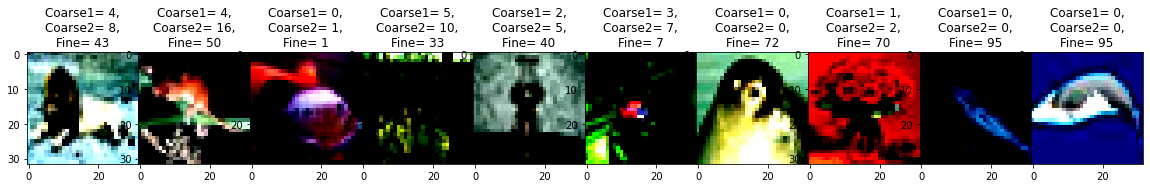

In [8]:
n_samples = 10

plot_column= 10
plot_row= math.ceil(n_samples/plot_column)

random_number= random.sample(range(0, len(x_train)), n_samples)
fig, axs = plt.subplots(plot_row,plot_column, #### Row and column number for n_samples
                        figsize=(20, 20), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)

axs = axs.ravel()

for i in range(n_samples):
    
    sample_image = x_train[random_number[i]].reshape(input_shape)
    axs[i].imshow(sample_image)
    
    ### FOR 2 Levels ###
#     axs[i].set_title('Coarse= {0},\nFine= {1}'.format(str(np.argmax(y_train_coarse[random_number[i]])), str(np.argmax(y_train_fine[random_number[i]]))))
    
    ### FOR 3 Levels ###
    axs[i].set_title('Coarse1= {0},\nCoarse2= {1},\nFine= {2}'.format(str(np.argmax(y_train_coarse1[random_number[i]])), str(np.argmax(y_train_coarse2[random_number[i]])), str(np.argmax(y_train_fine[random_number[i]]))))

# Model Training

## Create the model

In [11]:
caps1_n_dims = 8


fine_class = len(np.unique(np.argmax(y_train_fine, axis=1)))
medium_class = len(np.unique(np.argmax(y_train_coarse2, axis=1)))
coarse_class = len(np.unique(np.argmax(y_train_coarse1, axis=1)))

caps2_n_dims = 16

In [26]:
importlib.reload(MLmodel)
importlib.reload(datasets)
model = MLmodel.CIFAR10_HCapsNet(input_shape,
                               coarse_class, medium_class, fine_class)

# Model Analysis

In [20]:
model.summary()

Model: "H-CapsNet_CIFAR10"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input_Image (InputLayer)       [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1 (Conv2D)                 (None, 30, 30, 32)   896         ['Input_Image[0][0]']            
                                                                                                  
 batch_normalization_27 (BatchN  (None, 30, 30, 32)  128         ['conv1[0][0]']                  
 ormalization)                                                                                    
                                                                                                  
 conv2 (Conv2D)                 (None, 28, 28, 64)   18496       ['batch_normaliza

 r)                                                                                               
                                                                                                  
 coarse1_image_label (InputLaye  [(None, 8)]         0           []                               
 r)                                                                                               
                                                                                                  
 Mask_input_fine (Mask)         (None, 1600)         0           ['Digit_Caps_fine[0][0]',        
                                                                  'fine_image_label[0][0]',       
                                                                  'Fine_prediction_output_layer[0]
                                                                 [0]']                            
                                                                                                  
 Mask_inpu

In [32]:
cifar100 =datasets.CIFAR100()

In [34]:
cifar100.keys()

dict_keys(['x_train', 'y_train_coarse', 'y_train_medium', 'y_train_fine', 'x_test', 'y_test_coarse', 'y_test_medium', 'y_test_fine', 'tree'])